**OBS:** The whole notebook takes about 15 minutes to run.

###### Felipe BUZATO FRANÇA COSTA

In [40]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Simulation of the Brownian motion

$\textit{For a positive integer $n$, we denote $\Delta T := 2^{-n}T, {t_i}^n := i \Delta T, i = 0; . . . ; 2^n $. Our objective is to simulate a discretization of a Brownian motion $W$, and to study some properties.}$

1. Forward simulation of $\{ W_{{t_1}^n}, . . .  ,W_{{t_n}^n} \}$.

$\qquad$ $(a)$ Let's prove that $W_{{t_i}^n} = W_{{t_{i-1}}^n} + Z_i \sqrt{\Delta T}$ where $(Z_i)_{1 \leq i \leq 2n}$ is an iid family of $N(0, 1)$ random variables:

If $W_t$ is a Brownian Motion, its increments (with no intersection) are independent and normally distributed. Mathematically speaking, $W_{{t_i}^n} - W_{{t_{i-1}}^n} = \epsilon_i$, where $\epsilon _i \sim \mathcal{N}(0, {t_i}^n - {t_{i-1}}^n)$. Because a gaussien distribution is completelly determined by its mean and variance, $Z_i \sqrt{{t_i}^n - {t_{i-1}}^n} \sim \mathcal{N}(0, {t_i}^n - {t_{i-1}}^n)$, so $W_{{t_i}^n} = W_{{t_{i-1}}^n} + Z_i \sqrt{\Delta T}$.

$\qquad (b)$ Drawing a sample of $1000$ copies of the discretized Brownian motion $\{ W_{{t_1}^n} , . . . , W_{{t_n}^n} \}$.

In [41]:
def forward_brownian(T=1, n=10):
    delta_T = 2**(-n)*T
    
    # Matrix that will contain in each row a browninan motion:
    brownian = np.zeros((1000, 2**int(n)))
    
    for i in range(1000):
        brownian[i, 1:] += np.random.normal(0, 1, 2**int(n)-1)
        brownian[i] *= np.sqrt(delta_T)
        brownian[i] = np.cumsum(brownian[i])
    
    return brownian

# Simulating 1000 samples:
n=15
brownian = forward_brownian(n=n)

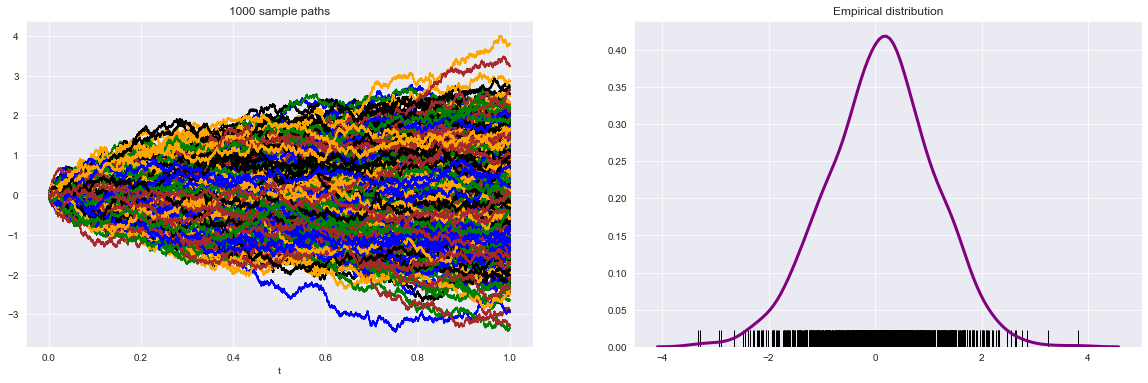

Mean: 0.1064682694020932 
Variance: 0.9899994518645489
Covariance (WT, WT/2): 0.48444502994876626


In [42]:
# Lets plot all the sample paths and see its empirical distribution
time = np.linspace(0, 1, 2**n)
colors = ['blue', 'black', 'green', 'orange', 'brown'] 

fig, ax = plt.subplots(1, 2, figsize=(20,6))
for i in range(len(brownian)):
    ax[0].plot(time, brownian[i], color = colors[i%len(colors)])
sns.distplot(brownian[:, -1], rug=True, hist=False, rug_kws={"color": "black"},
    kde_kws={"color": "purple", "lw": 3}, ax=ax[1])
ax[0].set_title("1000 sample paths")
ax[0].set_xlabel('t')
ax[1].set_title("Empirical distribution")
plt.show()

print("Mean:", np.mean(brownian[:, -1]), "\nVariance:", np.std(brownian[:, -1])**2)
halfway = int(brownian.shape[1]/2)  # T/2
print("Covariance (WT, WT/2):", np.mean((brownian[:, -1]-np.mean(brownian[:, -1])) * (brownian[:, halfway]-np.mean(brownian[:, halfway]))))

$\qquad (c)$ Computing the corresponding sample mean and variance of $W_T$ , and the sample covariance of $(W_T ,W_{T/2})$. After that, we will vary the value of $n$.

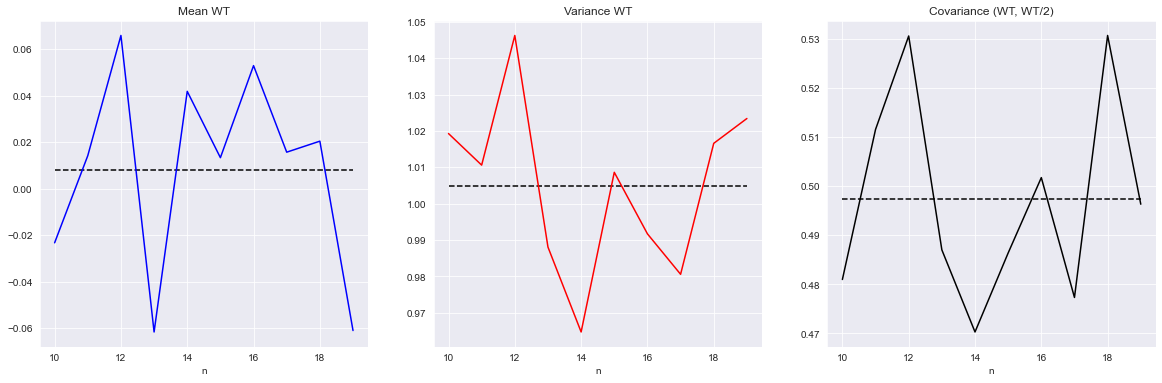

In [43]:
# Lets study the sample mean, variance and covariance by varying the value of n
ns = np.array([10,11,12,13,14,15,16,17,18,19]).astype(float)  # ns used
mean_vect = np.zeros(ns.size)       # sample mean for each n
variance_vect = np.zeros(ns.size)   # sample variance for each n
covariance_vect = np.zeros(ns.size) # sample covariance for each n

for i in range(ns.size):
    brownian = forward_brownian(n=ns[i])
    mean_vect[i] = np.mean(brownian[:, -1])
    variance_vect[i] = np.std(brownian[:, -1])**2
    halfway = int(brownian.shape[1]/2)  # T/2
    covariance_vect[i] = np.mean((brownian[:, -1]-np.mean(brownian[:, -1])) * (brownian[:, halfway]-np.mean(brownian[:, halfway])))

# Plotting the values obtained
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].plot(ns, mean_vect, color='blue')
ax[0].hlines(np.mean(mean_vect), color='black', linestyle='--', label="average", xmin=np.min(ns), xmax=np.max(ns))
ax[1].plot(ns, variance_vect, color='red')
ax[1].hlines(np.mean(variance_vect), color='black', linestyle='--', label="average", xmin=np.min(ns), xmax=np.max(ns))
ax[2].plot(ns, covariance_vect, color='black')
ax[2].hlines(np.mean(covariance_vect), color='black', linestyle='--', label="average", xmin=np.min(ns), xmax=np.max(ns))
ax[0].set_title("Mean WT")
ax[1].set_title("Variance WT")
ax[2].set_title("Covariance (WT, WT/2)")
ax[0].set_xlabel('n')
ax[1].set_xlabel('n')
ax[2].set_xlabel('n')
plt.show()

As we can see, the values of mean, variance and covariance, seem to oscilate near 0, 1 and 0.5 respectively. This makes sense, since $W_T \sim \mathcal{N}(0, T=1)$, and $Cov(W_T, W_{T/2}) = min(T, T/2) = T/2 = 0.5$

2. Backward simulation of $\{ W_{{t_1}^n}, . . .  ,W_{{t_n}^n} \}$.

$\qquad$ $(a)$ For $0 \leq s1 < s2$, we recall that the pair $({W_{s_1}}^n, {W_{s_2}}^n)$ is a centered Gaussian vector with covariance matrix $$\begin{pmatrix} s_1 & s_1 \\ s_1 & s_2 \end{pmatrix}$$


$\qquad$ and we verify therefore that $W_{s_1} | W_{s_2}$ is also Gaussian with characteristics $\mathbb{E} [W_{s_1} | W_{s_2}] = \frac{s_1}{s_2} W_{s_2}$ and $Var[W_{s_1} | W_{s_2}] = s_1 (1-s_1/s_2)$

$\qquad$ With $\overline{s} := \frac{s_1+s_2}{2}$, we'll prove that $W_{\overline{s}}|(W_{s_1} = x_1;W_{s_2} = x_2)$ has a Gaussian distribution with conditional mean $\overline{x} := \frac{x_1+x_2}{2}$ and conditional variance $\frac{s_2-s_1}{4}$.

$\underline{Proof}$: Let $s_1<s<s_2$. The random variable $W_t$ subject to the conditions $W_{s_1} = x_1$ and $W_{s_2} = x_2$ has the same distribution as the random variable $x_1 + W_{t-s_1}$ under the condition $W_{s_2-s_1} = x_2-x_1$. 

Applying the property from $(a)$, we get that the variable $x_1+W_{t-s_1}$ conditioned on $W_{s_2-s_1} = x_2-x_1$ is gaussian with expected value $x_1 + \frac{t-s_1}{s_2-s_1} (x_2-x_1)$ and variance $(t-s_1) (1-\frac{t-s_1}{s_2-s_1})$.

Now, if we take $t=\overline{t} = \frac{x_1+x_2}{2}$, we get the desired result.

$\qquad$ $(b)$ Now we'll prove that the conditional distribution of $W_{\overline{s}}|(W_{s_1} = x_1, W_{s_2} = x_2, (W_u)_{u \notin [s_1, s_2]})$ is $\mathcal{N}(\overline{x}; \frac{s_2-s_1}{4})$.



$\underline{Proof}$: Let $s_0<s_1$. The increment $W_{\overline{s}} - W_{s_1}$ is independent of $\mathcal{F}_{s_1}$ (filtration until $s_1$), so it is independent of $s_0$. The same way, supposing $s_3>s_2$ and using the time-reversed brownian motion, we can argue that $W_{\overline{s}} - W_{s_2}$ is independent of $s_3$.

$\qquad$ $(c)$ Using the last property to simulate backward the discretized Brownian motion: we'll start by drawing copies of $W_T$ , then $W_{T/2} = W_{{t_1}^1}$, then $W_{T/4} = W_{{t_1}^2}$ and $W_{3T/4} = W_{{t_3}^2}$, etc...

In [44]:
def backward_brownian(T=1, n=10):
    delta_T = 2**(-n)*T
    
    # Matrix that will contain in each row a browninan motion:
    brownian = np.zeros((1000, 2**int(n)+1))
    steps = brownian.shape[1]-1
    
    # Setting the values of WT
    brownian[:, -1] = np.random.normal(0, T, 1000)
    
    for i in range(1, int(n)+1):
        position = (T/2**i)*steps
        while(position < T*steps):
            s1 = position - (T/2**i)*steps
            s2 = position + (T/2**i)*steps
            mean = (brownian[:, int(s1)] + brownian[:, int(s2)])/2
            matrix_cov = np.diag(np.full(1000,(s2-s1)/(4*steps)))
            brownian[:, int(position)] = np.random.multivariate_normal(mean, matrix_cov, 1)
            position += (T/2**(i-1))*steps 
    return brownian

# Simulating 1000 samples:
n=7
brownian = backward_brownian(n=n)

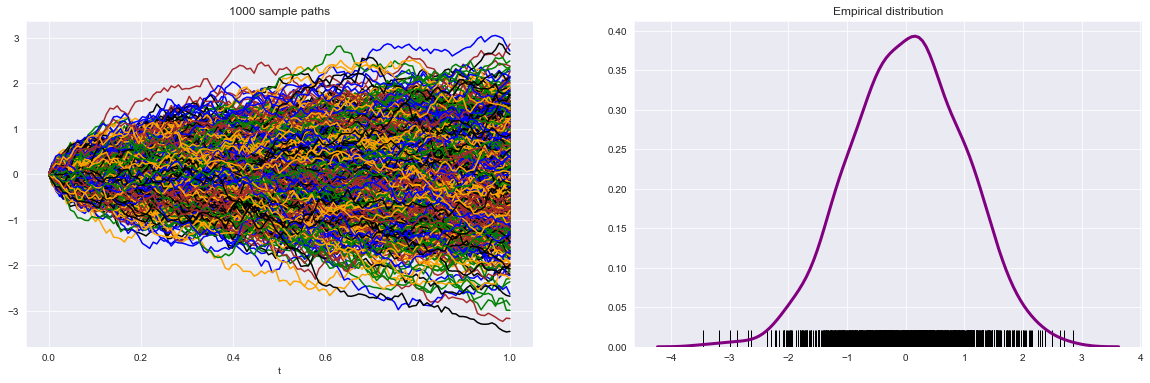

Mean: 0.028697170061511762 
Variance: 0.916697937081897
Covariance (WT, WT/2): 0.47510921726212507


In [45]:
# Lets plot all the sample paths and see its empirical distribution
time = np.linspace(0, 1, 2**n+1)
colors = ['blue', 'black', 'green', 'orange', 'brown'] 

fig, ax = plt.subplots(1, 2, figsize=(20,6))
for i in range(len(brownian)):
    ax[0].plot(time, brownian[i], color = colors[i%len(colors)])
sns.distplot(brownian[:, -1], rug=True, hist=False, rug_kws={"color": "black"},
    kde_kws={"color": "purple", "lw": 3}, ax=ax[1])
ax[0].set_title("1000 sample paths")
ax[0].set_xlabel('t')
ax[1].set_title("Empirical distribution")
plt.show()

print("Mean:", np.mean(brownian[:, -3]), "\nVariance:", np.std(brownian[:, -3])**2)
halfway = int(brownian.shape[1]/2)  # T/2
print("Covariance (WT, WT/2):", np.mean((brownian[:, -3]-np.mean(brownian[:, -3])) * (brownian[:, halfway]-np.mean(brownian[:, halfway]))))

$\qquad$ $(d)$ Computing the corresponding sample mean and variance of $W_T$ , and the sample covariance of $(W_T, W_{T/2})$. After that, we will vary the value of $n$.

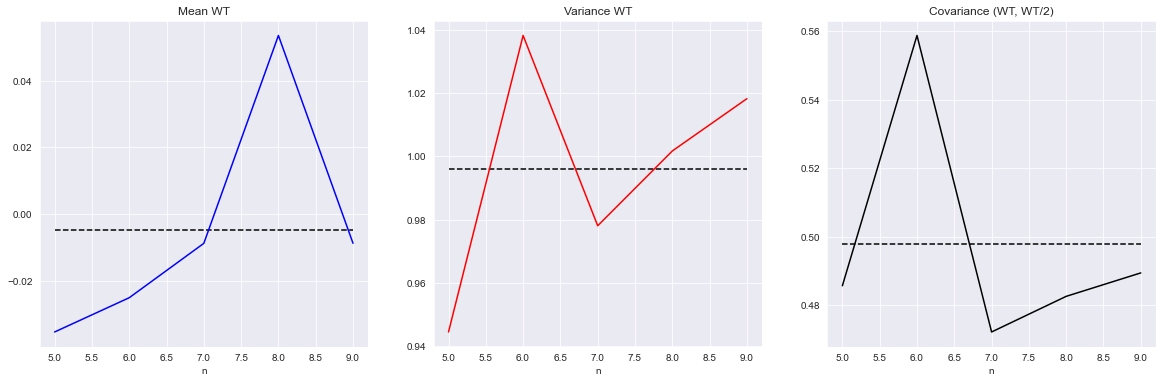

In [46]:
# Lets study the sample mean, variance and covariance by varying the value of n
ns = np.array([5,6,7,8,9]).astype(float)  # ns used
mean_vect = np.zeros(ns.size)       # sample mean for each n
variance_vect = np.zeros(ns.size)   # sample variance for each n
covariance_vect = np.zeros(ns.size) # sample covariance for each n

for i in range(ns.size):
    brownian = backward_brownian(n=ns[i])
    mean_vect[i] = np.mean(brownian[:, -1])
    variance_vect[i] = np.std(brownian[:, -1])**2
    halfway = int(brownian.shape[1]/2)  # T/2
    covariance_vect[i] = np.mean((brownian[:, -1]-np.mean(brownian[:, -1])) * (brownian[:, halfway]-np.mean(brownian[:, halfway])))

# Plotting the values obtained
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].plot(ns, mean_vect, color='blue')
ax[0].hlines(np.mean(mean_vect), color='black', linestyle='--', label="average", xmin=np.min(ns), xmax=np.max(ns))
ax[1].plot(ns, variance_vect, color='red')
ax[1].hlines(np.mean(variance_vect), color='black', linestyle='--', label="average", xmin=np.min(ns), xmax=np.max(ns))
ax[2].plot(ns, covariance_vect, color='black')
ax[2].hlines(np.mean(covariance_vect), color='black', linestyle='--', label="average", xmin=np.min(ns), xmax=np.max(ns))
ax[0].set_title("Mean WT")
ax[1].set_title("Variance WT")
ax[2].set_title("Covariance (WT, WT/2)")
ax[0].set_xlabel("n")
ax[1].set_xlabel("n")
ax[2].set_xlabel("n")
plt.show()

Like in the forward brownian motion, the values of mean, variance and covariance seem to oscilate near 0, 1 and 0.5, respectively. 

3. Using successively the forward and backward simulated samples, let's compute an approximation of $QV^n(W)_T$ , the quadratic variation of the Brownian motion along the partition $({t_i}^n)_i$. We'll test the computation for both forward and backward motions, and then make $n$ vary.

**OBS:** Due to the algorithm's complexity, I only used $n$ $\in$ $\{4, . . .  , 9\}$ for the backward case.

In [47]:
# Function that calculates the quadratic variation of each sample path and returns the mean and std over these values
def quadratic_variation(brownian):
    var_vector = np.zeros(1000)  # vector that will contain the quadratic variation for each sample path
    for i in range(1, brownian.shape[1]):
        var_vector += (brownian[:, i]-brownian[:, i-1])**2
    return np.array([np.mean(var_vector), np.std(var_vector)])

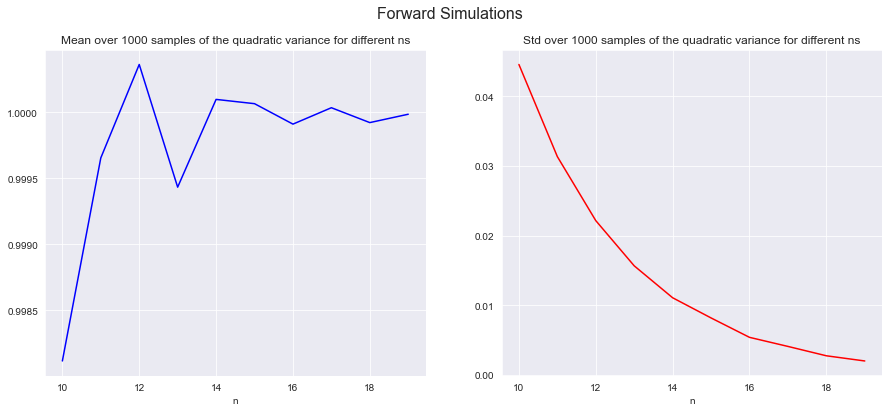

In [48]:
ns_forw = np.array([10,11,12,13,14,15,16,17,18,19]).astype(float)  # values that will be tested for n in the forward brownian
ns_backw = np.array([4,5,6,7,8,9]).astype(float)   # values that will be tested for n in the backward brownian
quad_var_forw = np.zeros((2, ns_forw.size))        # Line 1 will contain the mean, line 2 the std. Column j represents ns_forw[j]
quad_var_backw = np.zeros((2, ns_backw.size))      # Line 1 will contain the mean, line 2 the std. Column j represents ns_backw[j]

# Forward simulations
for i in range(ns_forw.size):
    forward_brow = forward_brownian(n=ns_forw[i])
    quad_var_forw[:, i] = quadratic_variation(forward_brow)

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].plot(ns_forw, quad_var_forw[0, :], color='blue')
ax[0].set_title("Mean over 1000 samples of the quadratic variance for different ns")
ax[1].plot(ns_forw, quad_var_forw[1, :], color='red')
ax[1].set_title("Std over 1000 samples of the quadratic variance for different ns")
ax[0].set_xlabel("n")
ax[1].set_xlabel("n")
fig.suptitle('Forward Simulations', fontsize=16)
plt.show()

We can see that the mean over all 1000 samples is always very close to 1, which makes sense because the quadratic variation, when $n \rightarrow \infty$, tends to $T=1$. In particular we can also see that the standard deviation of this value decreases as $n$ increases. 

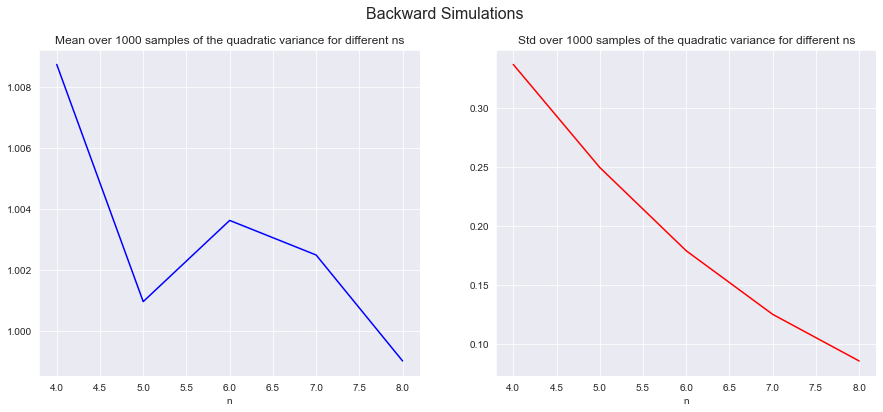

In [49]:
# Now lets do the backward simulations and estimations of the quadratic variation
for i in range(ns_backw.size):
    backward_brow = backward_brownian(n=ns_backw[i])
    quad_var_backw[:, i] = quadratic_variation(backward_brow)

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].plot(ns_backw, quad_var_backw[0, :], color='blue')
ax[0].set_title("Mean over 1000 samples of the quadratic variance for different ns")
ax[1].plot(ns_backw, quad_var_backw[1, :], color='red')
ax[1].set_title("Std over 1000 samples of the quadratic variance for different ns")
ax[0].set_xlabel("n")
ax[1].set_xlabel("n")
fig.suptitle('Backward Simulations', fontsize=16)
plt.show()

The behaviour is similar to the one observed with the forward simulations.